In [1]:
#!pip install jupyter_dashboards
#!jupyter dashboards quick-setup --sys-prefix

#!jupyter nbextension install --py jupyter_dashboards --sys-prefix
#!jupyter nbextension enable --py jupyter_dashboards --sys-prefix


In [13]:
%matplotlib inline

In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
#my_data_lst = ! ls -l data/*.zip
#my_data_lst = ["".join(i.split(" ")[-1:]) for i in my_data_lst]

#my_dat_lst = ! find . -type f -name "*.DAT"
#my_dat_lst_updated = [("/".join(i.split("/")[1:])) for i in my_dat_lst]

# Process data and save as csv file

In [4]:
#for i in my_dat_lst_updated:
#    A_str = ""
#    B_str = ""
#    C_str = ""
#    D_str = ""
#    Z_str = ""
#    with open(i) as f:
#        lis=[line.split() for line in f]
#        for i in lis:
#            if ("".join(i)).split(";")[0] == 'A':
#                A_str =  A_str + ";".join(("".join(i)).split(";")) + "\n"
#            if ("".join(i)).split(";")[0] == 'B':
#                B_str = B_str + ";".join(("".join(i)).split(";")) + "\n"
#            if ("".join(i)).split(";")[0] == 'C':
#                C_str = C_str + ";".join(("".join(i)).split(";")) + "\n"
#            if ("".join(i)).split(";")[0] == 'D':
#                D_str = D_str + ";".join(("".join(i)).split(";")) + "\n"
#            if ("".join(i)).split(";")[0] == 'Z':
#                Z_str = Z_str + ";".join(("".join(i)).split(";")) + "\n"
#    with open("data/processed/A_str.csv", "a") as a_myfile:
#        a_myfile.write(A_str)
#    with open("data/processed/B_str.csv", "a") as b_myfile:
#        b_myfile.write(B_str)
#    with open("data/processed/C_str.csv", "a") as c_myfile:
#        c_myfile.write(C_str)
#    with open("data/processed/D_str.csv", "a") as d_myfile:
#        d_myfile.write(D_str)
#    with open("data/processed/Z_str.csv", "a") as z_myfile:
#        z_myfile.write(Z_str)

In [5]:
cols = """Record_Type
District Code
Property Id
Sale Counter
Download Date Time
Property Name
Property Unit Number
Property House Number
Property Street Name
Property Locality
Property Post Code
Area
Area Type
Contract Date
Settlement Date
Purchase Price
Zoning
Nature of Property
Primary Purpose
Strata Lot Number
Component code
Sale Code
Percentage Interest of Sale
Dealing Number
Empty"""
col_header = [((i.replace(" ","_").replace("\n", ",")).split(",")) for i in cols.split('/n')]

# Read sold data and process 

In [6]:
df = pd.read_csv("data/processed/B_str.csv", sep=';', error_bad_lines=False)
df.columns = col_header[0]
df['Download_Date'] = pd.to_datetime(df['Download_Date_Time'].str[:8]) 


b'Skipping line 67556: expected 25 fields, saw 27\n'


In [30]:
df.head(1)

,Record_Type,District_Code,Property_Id,Sale_Counter,Download_Date_Time,Property_Name,Property_Unit_Number,Property_House_Number,Property_Street_Name,Property_Locality,...,Zoning,Nature_of_Property,Primary_Purpose,Strata_Lot_Number,Component_code,Sale_Code,Percentage_Interest_of_Sale,Dealing_Number,Empty,Download_Date
0,B,257,4127575.0,2,2018070901:21,NaN,NaN,301,KELLYSPLAINSRD,ARMIDALE,...,R5,V,VACANTLAND,NaN,AEV,NaN,0.0,AN462077,NaN,2018-07-09


In [31]:
df.describe

<bound method NDFrame.describe of        Record_Type  District_Code  Property_Id  Sale_Counter  \
0                B            257    4127575.0             2   
1                B            257    4079251.0             3   
2                B            257    4079253.0             4   
3                B            257    4119185.0             5   
4                B            257    4120993.0             6   
5                B            257    4015559.0             7   
6                B            257    1844482.0             8   
7                B            257    2642987.0             9   
8                B            257    2643742.0            10   
9                B            257    2642328.0            11   
10               B            257    2754482.0            12   
11               B            257    2754640.0            13   
12               B            257    2747054.0            14   
13               B            257    2752829.0            15   
14    

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

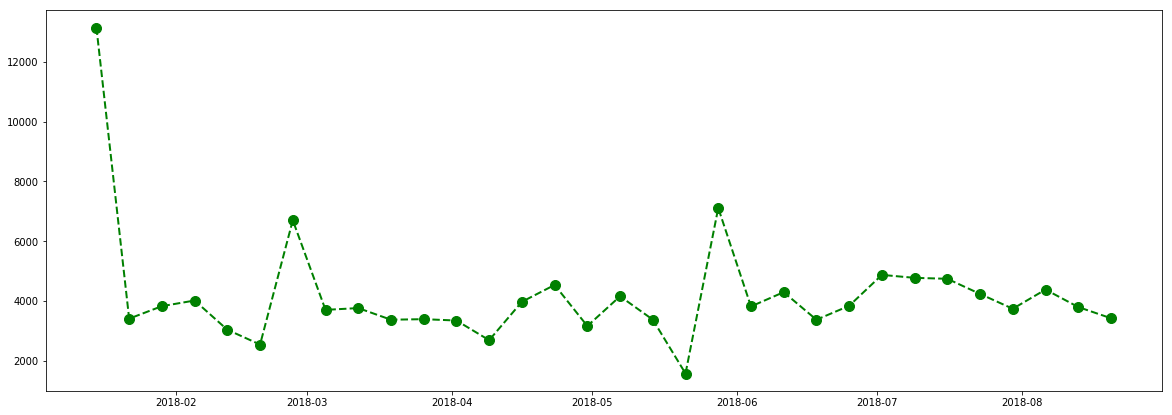

In [16]:
df_time_ser = df[['Download_Date','Property_Post_Code']].groupby(['Download_Date']).agg(['count'])
df_time_ser_col =  df_time_ser.reset_index()
df_time_ser_col.columns = ["date_sold","no_property_sold"]
plt.figure(figsize=(20,7))
x=df_time_ser_col['date_sold']
y=df_time_ser_col['no_property_sold']
plt.plot(x,y , color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt

In [ ]:
df[(df.A == 1) & (df.D == 6)]

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

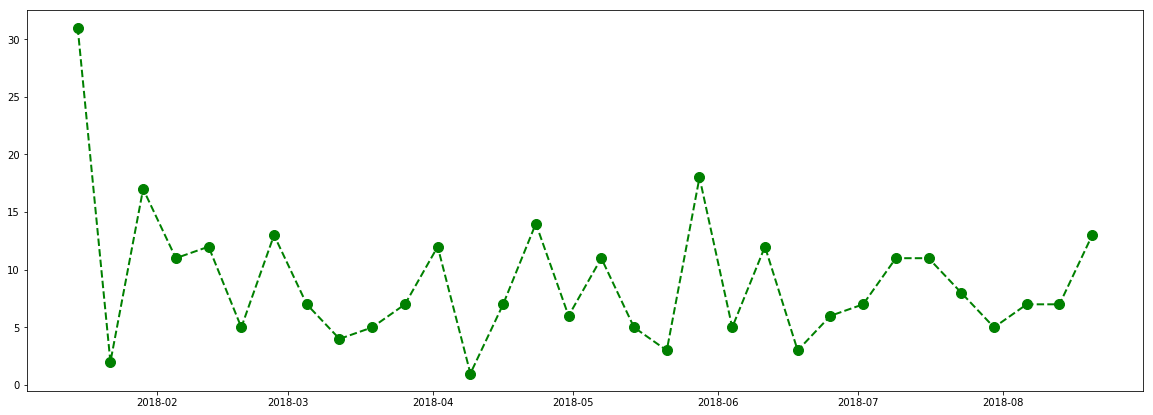

In [38]:
#df_time_ser = df[(df.Property_Post_Code == 2150)].df[['Download_Date','Property_Post_Code']].groupby(['Download_Date']).agg(['count'])
df_time_ser = df[(df.Property_Post_Code == 2763) & (df.Primary_Purpose == 'RESIDENCE')][['Download_Date','Property_Post_Code']].groupby(['Download_Date']).agg(['count'])
df_time_ser_col =  df_time_ser.reset_index()
df_time_ser_col.columns = ["date_sold","no_property_sold"]
plt.figure(figsize=(20,7))
x=df_time_ser_col['date_sold']
y=df_time_ser_col['no_property_sold']
plt.plot(x,y , color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt

In [42]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).mean()
    #pd.rolling_std(timeseries, window=12)
    
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [49]:
df_time_ser.head(1)

,Property_Post_Code
,count
Download_Date,
2018-01-15,31


In [48]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_time_ser, autolag='AIC')
#dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#for key,value in dftest[4].items():
#    dfoutput['Critical Value (%s)'%key] = value
#print (dfoutput)

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

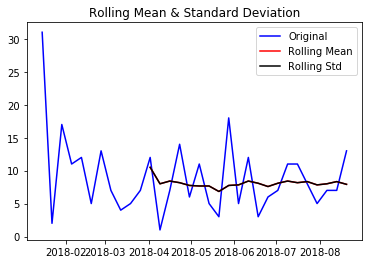

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [43]:
test_stationarity(df_time_ser)

In [ ]:
time_ser = df[]

In [ ]:
pd_coffee_survay_1['Download_Date'] = pd_coffee_survay_1['Download_Date_Time'].dt.date
df_timeseries = pd_coffee_survay_1[['to_Date','shop_name', 'Taste_Quantity','Price','Service_Speed', 'Atmosphere_Friendliness', 'Walking_Distance']].groupby(['to_Date']).agg(['mean'])
df_timeseries["Score"] = df_timeseries.sum(axis=1)
df_timeseries = df_timeseries.reset_index()
timeseries = df_timeseries[['to_Date','Score']]


plt.figure(figsize=(20,7))
x=timeseries['to_Date']
y=timeseries['Score']
plt.plot(x,y , color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt

In [95]:
df[df.Property_Post_Code ==2150].cou

,Record_Type,District_Code,Property_Id,Sale_Counter,Download_Date_Time,Property_Name,Property_Unit_Number,Property_House_Number,Property_Street_Name,Property_Locality,...,Purchase_Price,Zoning,Nature_of_Property,Primary_Purpose,Strata_Lot_Number,Component_code,Sale_Code,Percentage_Interest_of_Sale,Dealing_Number,Empty
1317,B,89,834151.0,20,2018070901:15,NaN,79,68,MACARTHURST,PARRAMATTA,...,567000,NaN,R,RESIDENCE,79.0,NaN,NaN,0.0,AN447924,NaN
1318,B,89,834151.0,21,2018070901:15,NaN,181,66,MACARTHURST,PARRAMATTA,...,567000,NaN,R,RESIDENCE,181.0,NaN,NaN,0.0,AN447924,NaN
1319,B,89,842598.0,22,2018070901:15,NaN,31,70,PHILLIPST,PARRAMATTA,...,1060000,NaN,3,COMMERCIAL,31.0,NaN,NaN,0.0,AN463728,NaN
1324,B,89,834803.0,27,2018070901:15,NaN,NaN,97,MACQUARIEST,PARRAMATTA,...,15250000,B4,3,COMMERICAL,NaN,PRP,BSO,0.0,AN205595,NaN
1334,B,89,855740.0,37,2018070901:15,NaN,1,12,WIGRAMST,HARRISPARK,...,443000,NaN,R,RESIDENCE,1.0,NaN,NaN,0.0,AN445634,NaN
1336,B,89,854608.0,39,2018070901:15,NaN,56,64,GREATWESTERNHWY,PARRAMATTA,...,532000,NaN,R,RESIDENCE,56.0,NaN,NaN,0.0,AN475384,NaN
1337,B,89,854777.0,40,2018070901:15,NaN,21,22,GREATWESTERNHWY,PARRAMATTA,...,280000,NaN,R,RESIDENCE,21.0,NaN,NaN,0.0,AN459742,NaN
1338,B,89,854777.0,41,2018070901:15,NaN,124,22,GREATWESTERNHWY,PARRAMATTA,...,328000,NaN,R,RESIDENCE,124.0,NaN,NaN,0.0,AN472134,NaN
1341,B,89,4055531.0,44,2018070901:15,NaN,105,2,AMOSSTBLOCKA,PARRAMATTA,...,780000,NaN,R,RESIDENCE,17.0,NaN,NaN,0.0,AN466735,NaN
1345,B,89,4100785.0,48,2018070901:15,NaN,10,26,TENNYSONST,PARRAMATTA,...,530000,NaN,R,RESIDENCE,10.0,NaN,NaN,0.0,AN474309,NaN


In [84]:
len(col_header[0])

26